In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import scipy.stats
import dask.dataframe as dd
import csv as csv
L_rad = 39.7

In [3]:
def format_energy(num):
    # Convert number to string in exponential notation with 3 decimal places
    num_str = "{:.5e}".format(num)
    # Extracting the exponent and coefficient parts
    coefficient, exponent = num_str.split('e')
    # Removing leading '+0' sign from the exponent
    exponent2 = exponent.replace('+0', '')
    if exponent2==exponent:
        raise Exception("Invalid energy for this formating. Energy must be within the interval [1,1e10)")
    # Formatting the coefficient part to have exactly 7 characters (including the '.')
    coefficient = coefficient.ljust(7, '0')
    # Return the formatted string with 9 characters
    return f"{coefficient}E{exponent2}"
energy_strs = [format_energy(num) for num in np.logspace(1,6,51)]
energies = np.logspace(1,6,51)

In [4]:
Dat = {}
header = [str(i) for i in np.linspace(0,4990,500)] + \
    ['Energy','ltot','gammaA','gammaB','covAA','covAB','covBB','NumPeaks','Peak1','Peak2','Peak3','Peak4','Peak5']
for energy_str in energy_strs:
    Dat[energy_str] = pd.read_csv('EnSplit/PION_' + energy_str + '.csv',names = header)

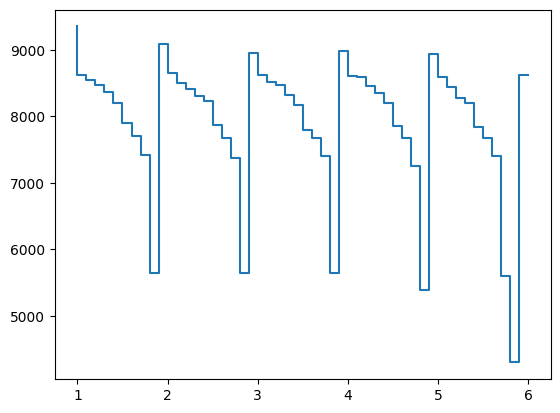

In [4]:
sizes = [len(Dat[en_strs]) for en_strs in energy_strs]
plt.step(np.log10(energies), sizes)

In [5]:
np.sum(sizes)

402863

In [86]:
for en_str in energy_strs:
    df = Dat[en_str]
    for i in range(len(df)):
        if np.isnan(df.covAA[i]):
            print(en_str,i)

1.00000E1 4341
1.99526E1 7071


19.9526 1.0


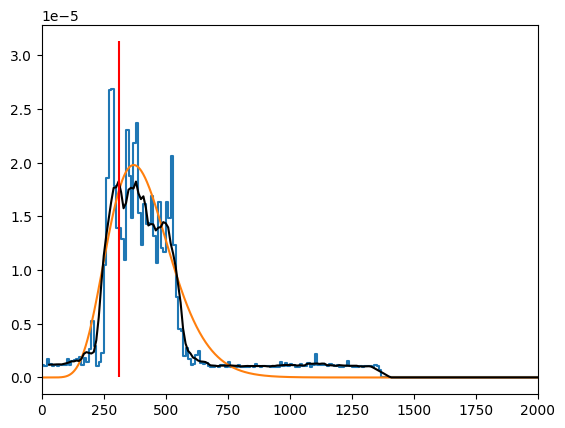

In [155]:
i = 84
en_str = energy_strs[3]
df = Dat[en_str]
data = df.iloc[i][:500]
energy = df.iloc[i].Energy
sn_window = 8
xvals = np.linspace(0,4990,500)
fine_xvals = np.linspace(0,4990,2000)
run = df.iloc[i]
plt.step(xvals,run[:500])
plt.plot(fine_xvals,sc.stats.gamma.pdf(fine_xvals/L_rad,run.gammaA,scale=1/run.gammaB)*10*run.ltot/L_rad)
plt.plot((np.arange(493)+sn_window/2 - 1)*10,pd.Series(run[:500]).rolling(sn_window).mean().dropna(),color='black')
plt.vlines(run[-5:]*L_rad,0,run.ltot/20,color='red')
plt.xlim(0,2000)
print(run.Energy,run.NumPeaks)

In [84]:
'''
--Every single peaked shower had a successful gamma fit

--Flaw in peak detection--misses early peaks
'''


'\nEvery single peaked shower had a successful gamma fit\n'

In [203]:
energy_strs[40]

'1.00000E5'

In [152]:
difs = {}
for en_str in energy_strs:
    df = Dat[en_str]
    difs[en_str] = []
    # for i in range(len(df)):
    for i in range(100):
        p,_ = sc.signal.find_peaks((df.iloc[i,:500]/energy).rolling(12).mean().dropna(),prominence=0.000000025,width=1)
        if len(p) != df.NumPeaks[i]:
            difs[en_str].append((i,p,df.NumPeaks[i]))
            # print(en_str,i,len(p),df.NumPeaks[i])

100000.0 1.0


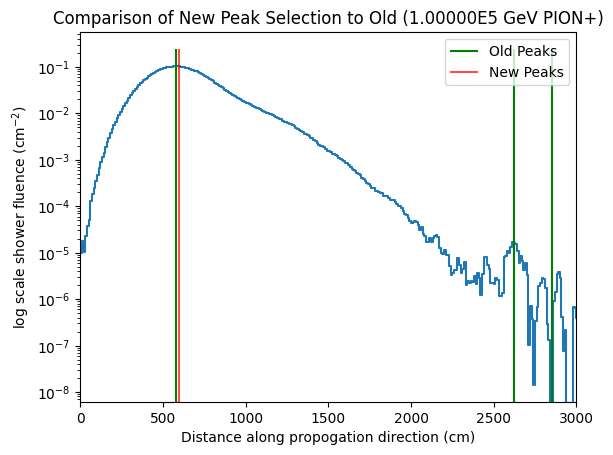

In [205]:
i = 96
en_str = energy_strs[40]
df = Dat[en_str]
data = df.iloc[i][:500]
energy = df.iloc[i].Energy
sn_window = 12
xvals = np.linspace(0,4990,500)
fine_xvals = np.linspace(0,4990,2000)
run = df.iloc[i]
plt.step(xvals,run[:500])
# plt.plot((np.arange(489)+sn_window/2 - 1)*10,pd.Series(run[:500]).rolling(sn_window).mean().dropna(),color='black')
plt.vlines((np.array([ 53, 257, 280]) + 5)*10,0,run.ltot/20,color='green',label='Old Peaks')
plt.vlines(run[-5:]*L_rad + 15,0,run.ltot/20,color='red',label='New Peaks',alpha=0.7)
plt.legend()
plt.xlim(00,3000)
# plt.ylim(0,0.005)
plt.yscale('log')
plt.title('Comparison of New Peak Selection to Old (1.00000E5 GeV PION+)')
plt.xlabel('Distance along propogation direction (cm)')
plt.ylabel('log scale shower fluence (cm$^{-2}$)')
print(run.Energy,run.NumPeaks)

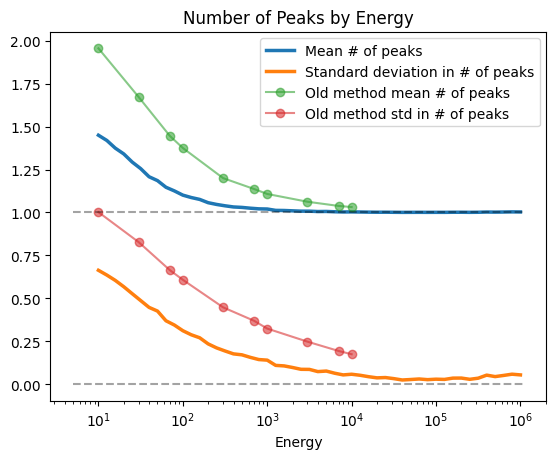

In [67]:
plt.plot(energies,[np.mean(Dat[key].NumPeaks) for key in Dat], label='Mean # of peaks',linewidth=2.5)
plt.plot(energies,[np.std(Dat[key].NumPeaks) for key in Dat], label='Standard deviation in # of peaks',linewidth=2.5)
old_means = [1.9553333333333334, 1.6716666666666666, 1.4461666666666666, 1.3753333333333333, 1.2, 1.1365, 1.1078333333333332, 1.0625, 1.0381666666666667, 1.0316666666666667]
old_stds = [1.0020004435572316, 0.8273636174956907, 0.664907491476989, 0.6083789024028438, 0.44795833139552915, 0.3695056382068705, 0.32435367356568595, 0.24818088161661447, 0.19419055647024192, 0.17511107586012054]
old_ens = [10,30,70,100,300,700,1000,3000,7000,10000]
plt.plot(old_ens,old_means,'o-',alpha=0.56,label='Old method mean # of peaks')
plt.plot(old_ens,old_stds,'o-',alpha=0.56,label='Old method std in # of peaks')
plt.xscale('log')
plt.xlabel('Energy')
plt.legend()
plt.plot([5,1.1e6],[1,1],color='black',linestyle='--',alpha=0.36)
plt.plot([5,1.1e6],[0,0],color='black',linestyle='--',alpha=0.36)
plt.title('Number of Peaks by Energy')
plt.show()

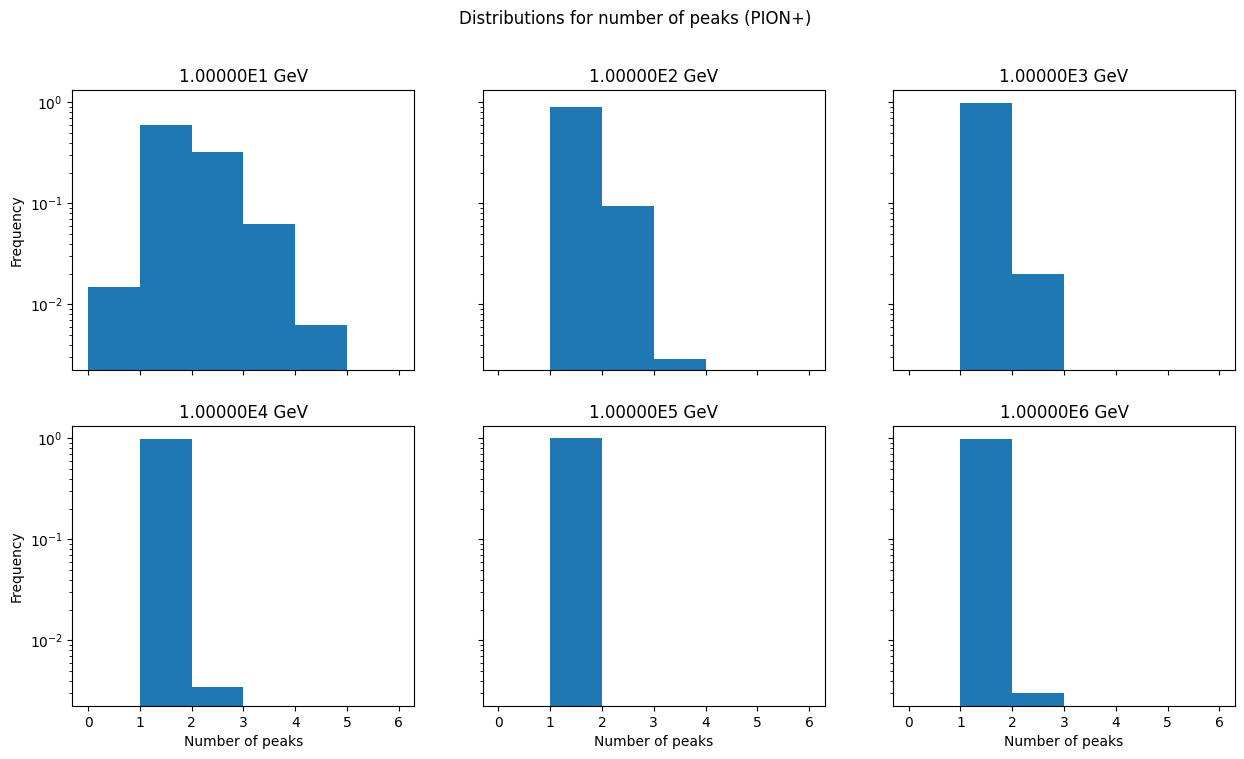

In [5]:
en_index = 0
fig, axs = plt.subplots(2,3,sharey=True,sharex=True)
for row in range(2):
    for col in range(3):
        en_str = energy_strs[en_index]
        df = Dat[en_str]
        axs[row][col].hist(df.NumPeaks, bins=np.arange(max(df.NumPeaks)+2),density=True)
        axs[row][col].set_title(en_str + ' GeV')
        en_index += 10
fig.set_size_inches(15, 8)
axs[0][0].set_ylabel('Frequency')
axs[1][0].set_ylabel('Frequency')
for col in range(3):
    axs[1][col].set_xlabel('Number of peaks')
fig.suptitle('Distributions for number of peaks (PION+)')
plt.yscale('log')
plt.show()

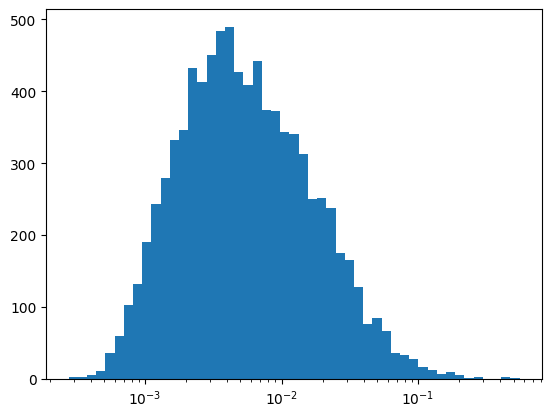

In [13]:
# [Dat[key].covAA/Dat[key].gammaA for key in Dat]
en_str = energy_strs[1]
df = Dat[en_str]
hist_dat = df.covAA/df.gammaA
bins = np.logspace(np.log10(np.min(hist_dat)),np.log10(np.max(hist_dat)),50)
plt.hist(hist_dat,bins=bins)
axs = plt.gca()
# axs.set_xticklabels([np.exp(text.get_position()[0]) for text in axs.get_xticklabels()])
# for text in axs.get_xticklabels():
#     text.x(40) .('30')
#     print(text.set_x(40))
plt.xscale('log')  
plt.show()

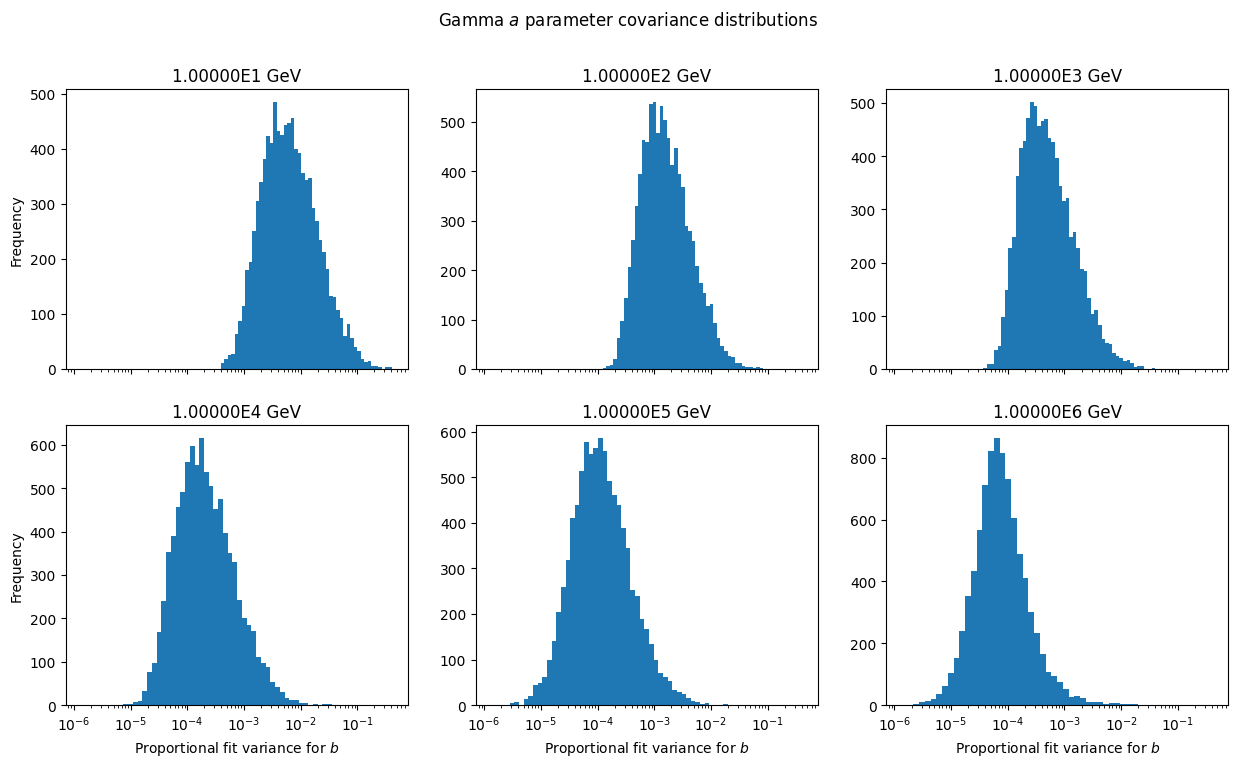

In [24]:
en_index = 0
fig, axs = plt.subplots(2,3,sharey=False,sharex=True)
for row in range(2):
    for col in range(3):
        en_str = energy_strs[en_index]
        df = Dat[en_str]
        hist_dat = (df.covAA/df.gammaA)
        bins = np.logspace(np.log10(np.min(hist_dat)),np.log10(np.max(hist_dat)),50)
        axs[row][col].hist(hist_dat, bins=bins,density=False)
        axs[row][col].set_title(en_str + ' GeV')
        axs[row][col].set_xscale('log')
        en_index += 10
fig.set_size_inches(15, 8)
axs[0][0].set_ylabel('Frequency')
axs[1][0].set_ylabel('Frequency')
for col in range(3):
    axs[1][col].set_xlabel('Proportional fit variance for $b$')
fig.suptitle('Gamma $a$ parameter covariance distributions')
plt.show()

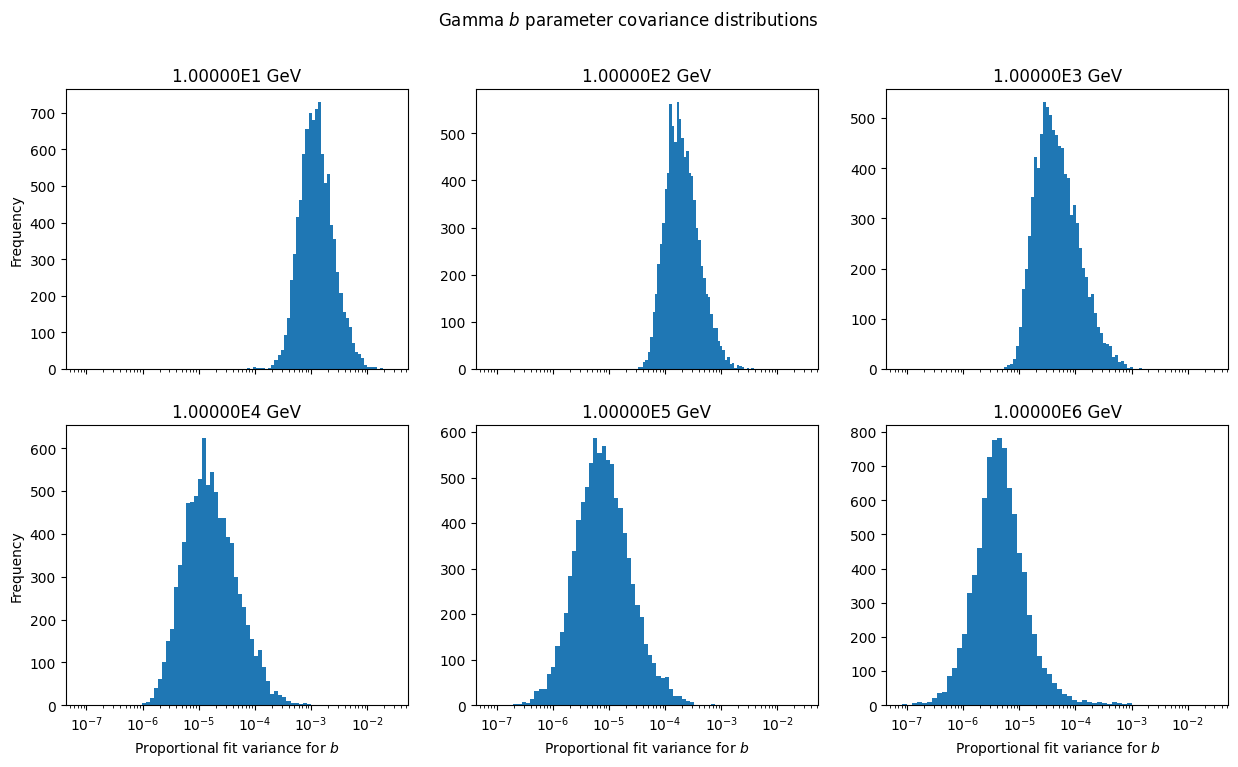

In [25]:
en_index = 0
fig, axs = plt.subplots(2,3,sharey=False,sharex=True)
for row in range(2):
    for col in range(3):
        en_str = energy_strs[en_index]
        df = Dat[en_str]
        hist_dat = (df.covBB/df.gammaB)
        bins = np.logspace(np.log10(np.min(hist_dat)),np.log10(np.max(hist_dat)),50)
        axs[row][col].hist(hist_dat, bins=bins,density=False)
        axs[row][col].set_title(en_str + ' GeV')
        axs[row][col].set_xscale('log')
        en_index += 10
fig.set_size_inches(15, 8)
axs[0][0].set_ylabel('Frequency')
axs[1][0].set_ylabel('Frequency')
for col in range(3):
    axs[1][col].set_xlabel('Proportional fit variance for $b$')
fig.suptitle('Gamma $b$ parameter covariance distributions')
plt.show()

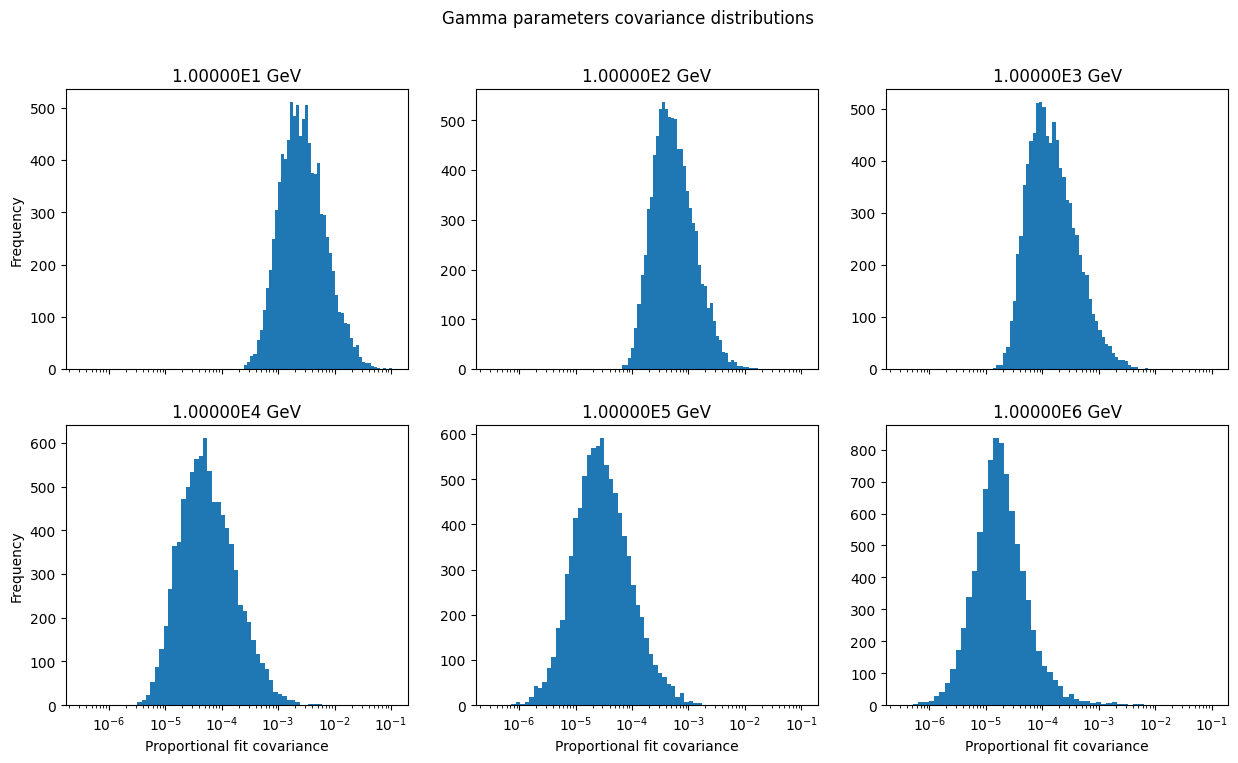

In [28]:
en_index = 0
fig, axs = plt.subplots(2,3,sharey=False,sharex=True)
for row in range(2):
    for col in range(3):
        en_str = energy_strs[en_index]
        df = Dat[en_str]
        hist_dat = df.covAB/np.sqrt(df.gammaA*df.gammaB)
        bins = np.logspace(np.log10(np.min(hist_dat)),np.log10(np.max(hist_dat)),50)
        axs[row][col].hist(hist_dat, bins=bins,density=False)
        axs[row][col].set_title(en_str + ' GeV')
        axs[row][col].set_xscale('log')
        en_index += 10
fig.set_size_inches(15, 8)
axs[0][0].set_ylabel('Frequency')
axs[1][0].set_ylabel('Frequency')
for col in range(3):
    axs[1][col].set_xlabel('Proportional fit covariance')
fig.suptitle('Gamma parameters covariance distributions')
plt.show()

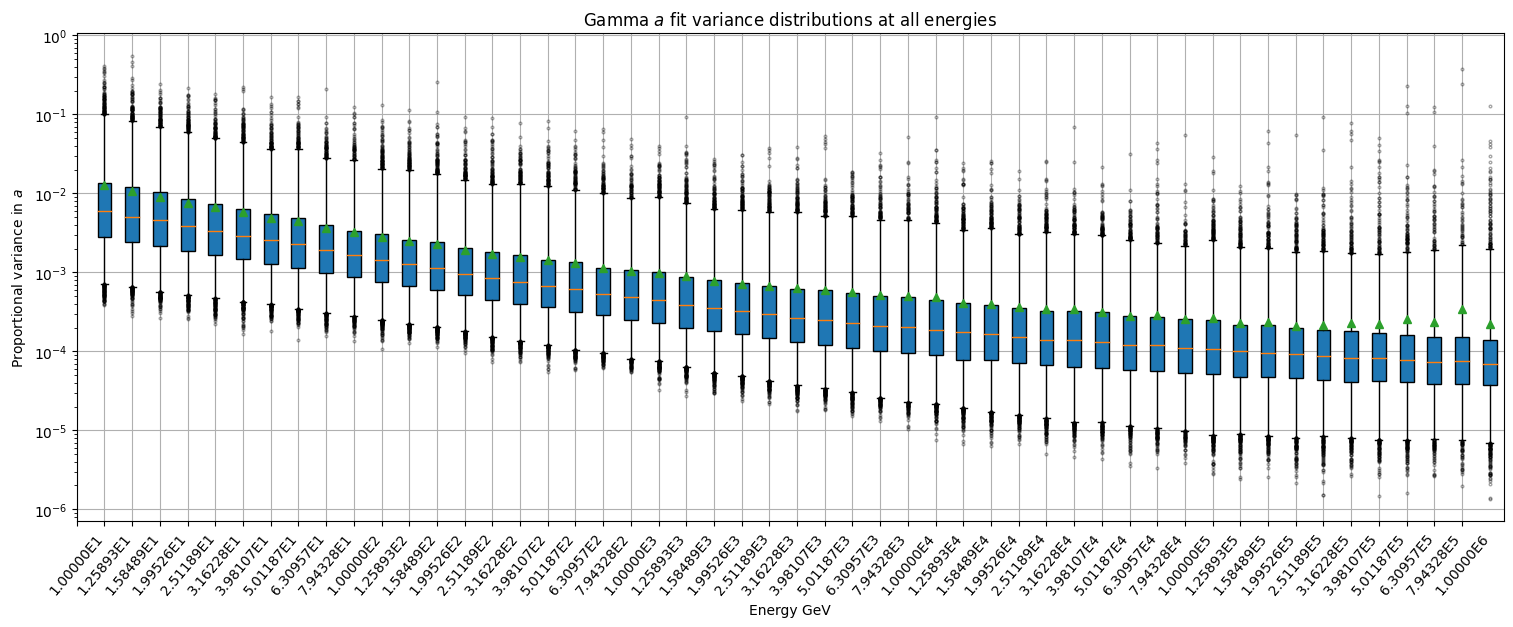

In [78]:
data = list(range(51))
for i in range(51):
    df = Dat[energy_strs[i]]
    data[i] = (df.covAA/df.gammaA).dropna()
# Creating boxplot
plt.figure(figsize=(15, 6))  # Adjust the figure size as needed
box = plt.boxplot(data, patch_artist=True, showmeans=True,whis=(1,99))
for flier in box['fliers']:
    flier.set(marker='.', color='black', alpha=0.35, markersize=3.75)
plt.xticks(np.arange(0,51), energy_strs, rotation=50)
plt.yscale('log')
plt.grid(True)
plt.tight_layout()
plt.title('Gamma $a$ fit variance distributions at all energies')
plt.xlabel('Energy GeV')
plt.ylabel('Proportional variance in $a$')
plt.show()

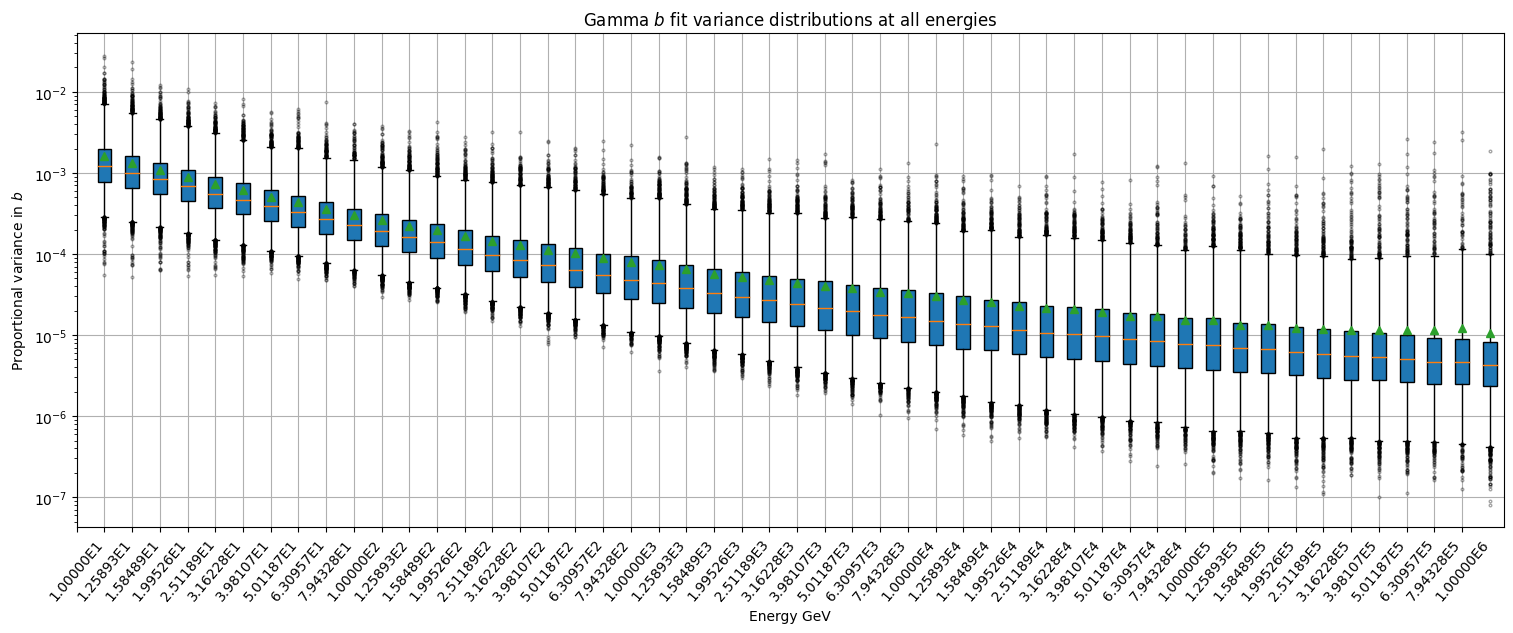

In [79]:
data = list(range(51))
for i in range(51):
    df = Dat[energy_strs[i]]
    data[i] = (df.covBB/df.gammaB).dropna()
# Creating boxplot
plt.figure(figsize=(15, 6))  # Adjust the figure size as needed
box = plt.boxplot(data, patch_artist=True, showmeans=True,whis=(1,99))
for flier in box['fliers']:
    flier.set(marker='.', color='black', alpha=0.35, markersize=3.75)
plt.xticks(np.arange(0,51), energy_strs, rotation=50)
plt.yscale('log')
plt.grid(True)
plt.tight_layout()
plt.title('Gamma $b$ fit variance distributions at all energies')
plt.xlabel('Energy GeV')
plt.ylabel('Proportional variance in $b$')
plt.show()

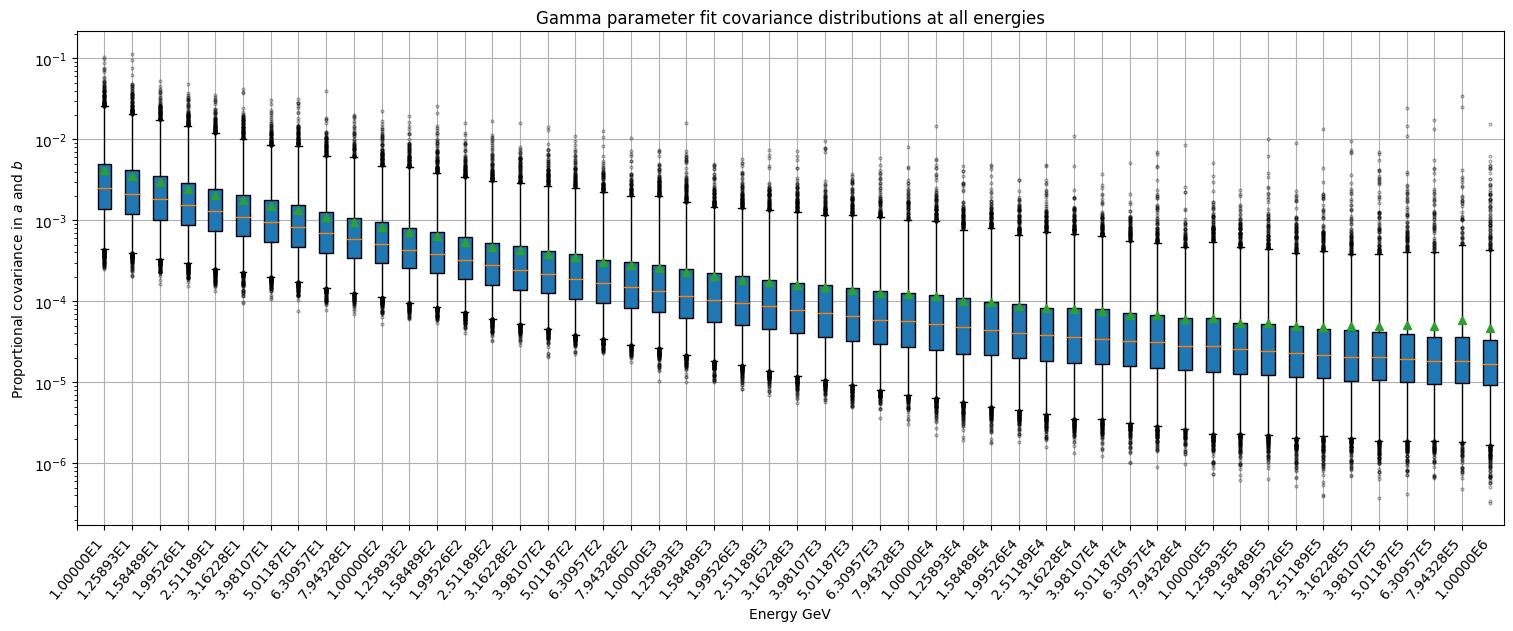

In [80]:
data = list(range(51))
for i in range(51):
    df = Dat[energy_strs[i]]
    data[i] = (df.covAB/np.sqrt(df.gammaA*df.gammaB)).dropna()
# Creating boxplot
plt.figure(figsize=(15, 6))  # Adjust the figure size as needed
box = plt.boxplot(data, patch_artist=True, showmeans=True,whis=(1,99))
for flier in box['fliers']:
    flier.set(marker='.', color='black', alpha=0.35, markersize=3.75)
plt.xticks(np.arange(0,51), energy_strs, rotation=50)
plt.yscale('log')
plt.grid(True)
plt.tight_layout()
plt.title('Gamma parameter fit covariance distributions at all energies')
plt.xlabel('Energy GeV')
plt.ylabel('Proportional covariance in $a$ and $b$')
plt.show()